## Распределение Стьюдента
Эмпирически, то есть опытным путём, было выяснено, что если в исходной выборке не более 30 значений, то выборочное среднее такой выборки, скорее всего, будет иметь распределение Стьюдента, или t-распределение.
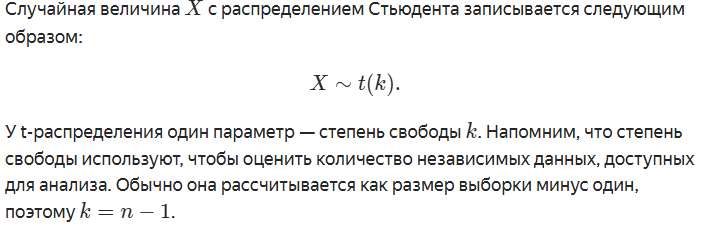
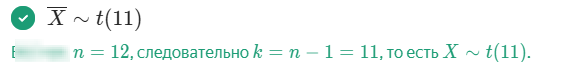

### График функции плотности вероятности t-распределения 
визуально схож с нормальным распределением: он также симметричен относительно выборочного среднего. Однако его «колокол» шире, чем у нормального распределения. Это объясняется тем, что в случае t-распределения мы не знаем дисперсию генеральной совокупности и используем её оценку — выборочную дисперсию.
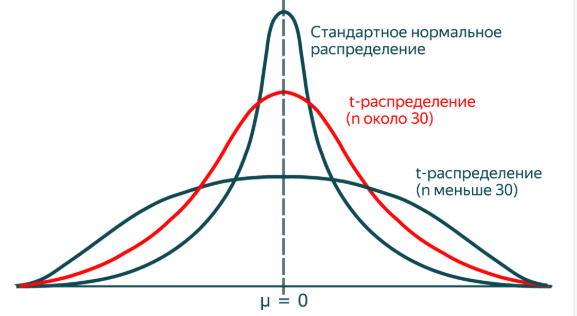
Кроме того, t-распределение описывает распределение выборочных средних, которые вычисляются на основе нескольких выборок из генеральной совокупности разных размеров. При малых размерах выборок разброс средних будет больше, что приводит к более широкой форме распределения — «размашистому» колоколу. Иногда ещё говорят, что у распределения «тяжелые хвосты» — из-за того, что в хвостовых частях распределения, то есть слева и справа, функция убывает ощутимо медленно.
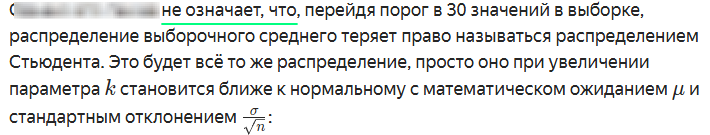

## t-тест
**t-тест** - cтатистический тест, который проверяет гипотезу о среднем, имеющем t-распределение.   
Под гипотезой о среднем понимается утверждение о том, что среднее значение выборки (или разница между средними значениями двух выборок) отличается от предполагаемого значения, например от среднего генеральной совокупности или от разницы средних в двух группах.

t-тест — работает для выборки любого размера - чтобы не усложнять себе жизнь выбором нужного теста, принято каждый раз применять t-тест. В А/В тестировании t-тест считается основополагающим, ведь с его помощью можно проверить большую часть бизнес-гипотез.  

В зависимости от количества выборок в гипотезе t-тест бывает одновыборочным и двухвыборочным.   
у t-теста есть свои ограничения, и не в каждом случае его можно применять. 

## Проверка гипотез с одной выборкой в Python

проверим несколько гипотез о равенстве выборочного среднего некоторому значению, пользуясь одной выборкой. 
Для этого будем использовать метод **ttest_1samp(a, popmean, alternative)** из **модуля scipy.stats** библиотеки scipy.

Разберём код поподробнее.

В названии метода ttest_1samp() есть постфикс 1samp — он указывает на то, что это тест с одной выборкой. 

В таком тесте сравнивается посчитанный по выборке статистический параметр с заранее заданным значением.

Методу передаются аргументы:

 - **a** (от англ. array — «массив») — набор данных, который содержит выборку. Это может быть, например, pandas.Series или список Python.
 - **popmean** (от англ. population mean — «среднее значение генеральной совокупности», буквально «среднее в популяции») — предполагаемое среднее из сформулированной гипотезы, на равенство которому вы делаете тест.
 - **alternative** — строковый параметр, задающий альтернативную гипотезу. Варианты: 
     - 'two-sided' двусторонняя (не равна ген.совокупности т.е. больше или меньше)
     - 'less' левосторонняя (меньше среднего ген. совокупности)
     - 'greater'  правосторонняя альтернативные гипотезы (больше среднего ген.совок)
         
Если не передать этот аргумент методу, по умолчанию будет проверяться two-sided -двусторонняя альтернативная гипотеза.

После выполнения метод вернёт **статистику разности** между popmean и выборочным средним из **a**,  **значение p-value**, а также **количество степеней свободы df**, равное длине массива popmean за вычетом единицы.

### пример
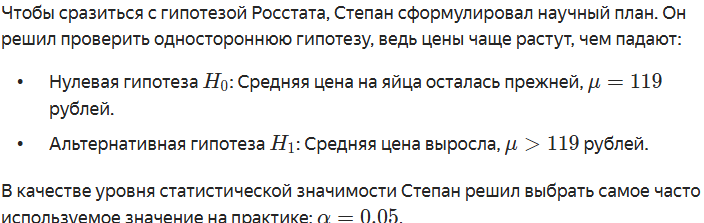

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd

egg_prices = pd.read_csv('https://code.s3.yandex.net/datasets/eggs.csv')['prices']

# Ожидаемая средняя цена со слов Росстата
expected_mean_price = 119

# Уровень статистической значимости: можно указать .05 или 0.05
alpha = 0.05

results = st.ttest_1samp(
    egg_prices, 
    expected_mean_price,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.01467368985136619
Отвергаем нулевую гипотезу, принимаем альтернативную


Средняя цена на десяток яиц действительно выросла. Получим больше информации и также посчитаем, на сколько процентов выросла средняя цена:

In [2]:
real_mean_price = egg_prices.mean()

price_diff = round(100.0 * (real_mean_price - expected_mean_price) / expected_mean_price, 2)
print(f'Цена выросла на {price_diff}%') 

Цена выросла на 1.75%


Отметим, что в примере использовалась односторонняя гипотеза, потому что Степан был заинтересован исключительно в проверке роста цен, а не любых изменений. Тогда закономерный вопрос: что покажет тест, если средняя цена по выборке окажется ниже предполагаемого значения, например в случае μ=P1<119
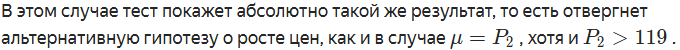
Дело в том, что уровень значимости отсекает критическую область — если значение выборочного среднего в неё не попадает, альтернативная гипотеза будет отвергнута, хотя при этом значение может быть больше предполагаемого среднего. Значения меньше предполагаемого среднего, которые находятся ещё левее, и подавно будут отвергать альтернативную гипотезу. Только при попадании выборочного среднего в критическую область (в случае μ=P3) будет отвергнута нулевая гипотеза, и мы можем сказать, что рост цен действительно имел место.
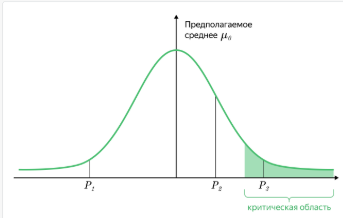

### пример о бабочках  
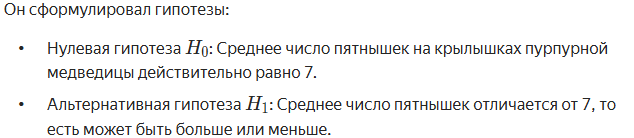

In [3]:
from scipy import stats as st
import numpy as np
import pandas as pd

spots_on_butterflies = (
pd.read_csv('https://code.s3.yandex.net/datasets/butterflies.csv')['spots'])

# Столько пятнышек в среднем должно быть на крыльях бабочки
expected_number_of_spots = 7

# Уровень статистической значимости: можно указать .05 или 0.05
alpha = 0.05

results = st.ttest_1samp(
    spots_on_butterflies, # датафрейм с данными о пятнышках # или массив
    expected_number_of_spots, #ожид. число пятнышек или #среднее зн.ген.сов-ти
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.46011546792503244
Не получилось отвергнуть нулевую гипотезу


так как нулевую гипотезу не получилось отвергнуть, подтверждаются догадки Пети о том, что в среднем на крылышках медведицы 7 пятнышек. Поскольку было не важно, больше пятнышек или меньше, взяли двустороннюю альтернативную гипотезу. Например, если бы выборочное среднее оказалось равным P1или Р
, то в обоих случаях мы бы отвергли нулевую гипотезу и усомнились в данных энциклопедии. 
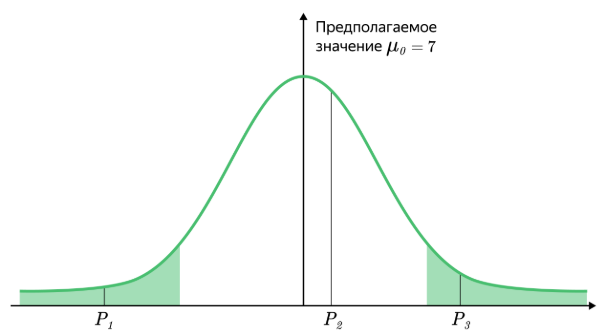

Вы можете лишь сделать предположение о генеральной совокупности и при условии того, что оно верно, посчитать, насколько вероятно увидеть в выборке полученные значения.

**Если эта вероятность относительно высока — данные не дают основания отвергнуть предположение.** Это неравнозначно утверждению «данные дают основания принять это предположение». 

**Если вероятность низка — по наблюдаемым данным можно сделать вывод, что предположение, скорее всего, неверно. Но нельзя опровергнуть его или доказать обратное.**

## Проверка гипотез с двумя выборками в Python
На деле же чаще приходится сравнивать характеристики нескольких выборок между собой. Самый частый пример применения такой методики — это практика А/В тестирования.
Допустим, вы внесли какие-либо изменения в сервис (например, изменили дизайн карточки товара интернет-магазина) и хотите протестировать эти нововведения на пользователях. Одна группа пользователей видит старую версию страницы товара, а вторая — обновлённую. Цель — понять, насколько новый дизайн справился с задачей сделать покупку более удобной. Для этого можно проанализировать метрики заказов в обеих группах. То есть сравнить средние суммы покупок двух выборок.

Если же мы работаем с двумя выборками, то цель — сравнить средние значения этих двух групп. Это нужно, чтобы выяснить, есть ли между ними значимые различия, например при сравнении двух подходов, условий или групп людей. Таким образом, гипотезы с одной выборкой отвечают на вопрос «соответствует ли фактическая ситуация ожиданиям?», а с двумя выборками — «есть ли эффект от изменения или нововведения?»
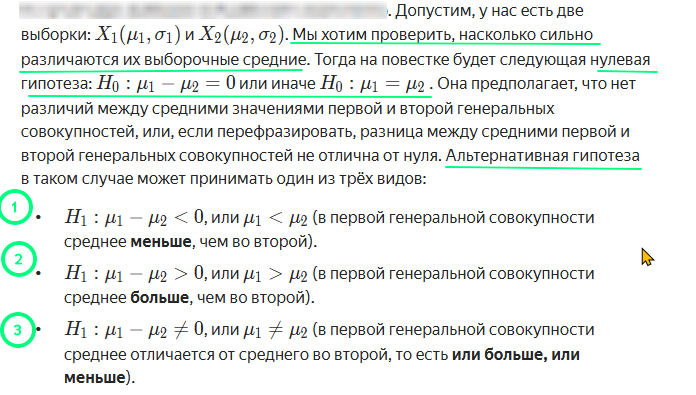

### Проверка гипотез с двумя выборками в Python
для проверки гипотезы о равенстве средних двух выборок используется t-test, а именно — его двухвыборочный аналог. Всё в том же модуле scipy.stats библиотеки scipy можно найти метод **ttest_ind()**, применимый для случая двух выборок.  
В названии метода постфикс ind (от англ. independent — «независимый») указывает на то, что это тест с двумя независимыми выборками. 

Параметры метода:
 - a и b — набор данных первой и второй выборки соответственно. Это может быть, например, серия из pandas или список Python.
- alternative — строковый параметр, задающий альтернативную гипотезу. Варианты: 'two-sided', 'less', 'greater' (соответственно, двусторонняя, левосторонняя и правосторонняя H1).Если не передать этот аргумент методу, по умолчанию будет проверяться двусторонняя альтернативная гипотеза - two-sided.  
После выполнения метод вернёт статистику разности между выборочными средними выборок a и b, значение p-value, а также количество степеней свободы df, равное суммарной длине коллекций a и b за вычетом двух.

 степень свободы — это число, которое используют, чтобы оценить количество независимых данных, доступных для анализа. Обычно это число рассчитывается как размер выборки минус один. у нас две выборки - значит минус 2


### пример о фикусах
У Ани целая роща фикусов — сорок растений! Для эксперимента Аня разделила их на две группы по двадцать фикусов. Первая группа питалась проверенным временем компостом, а вторая — новаторской «ФитоСилой 3000». Садовод измерила, насколько вырос каждый фикус в сантиметрах спустя месяц удабривания, и записала наблюдения в блокнот.
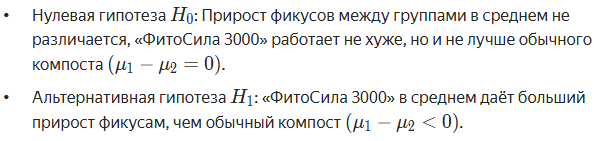

In [4]:
from scipy import stats as st
import numpy as np
import pandas as pd

ficus_data = pd.read_csv('https://code.s3.yandex.net/datasets/ficus.csv')

# Данные о приросте фикусов из группы, удабриваемой обычным компостом
ficus_group_1 = ficus_data['group_1']
# Данные о приросте фикусов из группы, удабриваемой «ФитоСилой 3000»
ficus_group_2 = ficus_data['group_2'] 

# Уровень статистической значимости: можно указать .05 или 0.05
alpha = 0.05 

results = st.ttest_ind( 
    ficus_group_1, 
    ficus_group_2,
    alternative='less' #Альтернативная гипотеза, которую проверяем: mu1 < mu2
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.00016340550921925925
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу в пользу альтернативной, а это значит следующее: на основе того, что мы знаем об Аниных фикусах, «ФитоСила 3000» показывает статистически значимый более быстрый рост, чем обычное удобрение.  
**!если мы принимаем или отвергаем нулевую гипотезу, важно подчёркивать, что такой вывод мы делаем строго на основе имеющихся данных.**

дополнительно Рассчитаем абсолютную (на сколько сантиметров) и относительную (на сколько процентов) разницу между выборочными средними групп.

In [5]:
# Среднее значение роста фикусов на обычном удобрении
group_1_growth = ficus_data['group_1'].mean() 
# Среднее значение роста фикусов на «ФитоСиле 3000»
group_2_growth = ficus_data['group_2'].mean()

growth_diff = round(group_2_growth - group_1_growth, 2)
growth_diff_perc = round(100.0 * (group_2_growth - group_1_growth) / group_1_growth, 2)
print(f'В среднем рост за месяц ускорился на {growth_diff_perc}% или {growth_diff} см.')

В среднем рост за месяц ускорился на 32.19% или 1.22 см.


### пример о кофе и матча
эксперимент, в котором участники разделятся на две группы: одна пьёт кофе, а другая — матчу. Затем они оценивают свою бодрость через час после употребления напитков по шкале от 1 до 10, где 1 — это полная усталость, а 10 — максимальная бодрость. Сравнив результаты, можно будет проверить, действительно ли матча обладает более мягким и длительным эффектом бодрости по сравнению с кофе, как утверждают сторонники этого напитка.
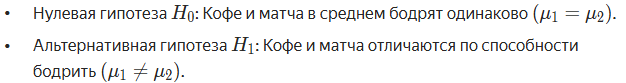

In [6]:
from scipy import stats as st
import numpy as np
import pandas as pd

energy_levels = pd.read_csv('https://code.s3.yandex.net/datasets/coffee_vs_matcha.csv')

# Уровни бодрости тех, кто пил кофе
coffee_group = energy_levels['coffee']
# Уровни бодрости тех, кто пил матчу
matcha_group = energy_levels['matcha']

# Уровень статистической значимости: можно указать .05 или 0.05
alpha = 0.05

results = st.ttest_ind(
    coffee_group, 
    matcha_group,
    alternative='two-sided' # Альт.гипотеза, которую проверяем: mu1 != mu2
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.19996616554572863
Не получилось отвергнуть нулевую гипотезу


получили p-value, равное примерно 0.2, что оказалось больше выбранного уровня значимости 0.05. Это означает, что результаты его эксперимента не являются статистически значимыми на уровне 5% и вывод о различии в бодрости между кофе и матчей нельзя считать доказанным.

возможно, нужно больше данных или другие методы исследования. Так он сможет точно определить, влияет ли матча на бодрость сильнее или слабее кофе.

ельзя точно подтвердить или опровергнуть гипотезу. Выборка показывает лишь часть «реальной ситуации», которая происходит в генеральной совокупности. Поэтому правильно было бы сделать из этого эксперимента вывод, что **на основе этого эксперимента и имеющихся в нём данных не нашлось достаточных доказательств того, что матча действительно превосходит кофе по уровню бодрости.**

### пример «Колесо путешествий».
эксперимент, предварительно разделив всех пользователей на две группы:
 - Группа A пользовалась стандартным поиском.
 - Группа B получила доступ к функции «Колесо путешествий».  
В течение двух месяцев собирались данные о поведении пользователей в каждой группе и получились две выборки, сложенные в таблицу travel_wheel.csv. В каждой из выборок a и b каждому пользователю присвоена метка: 0 — если пользователь не совершил бронирование, 1 — если пользователь забронировал поездку. Таблица имеет вид:
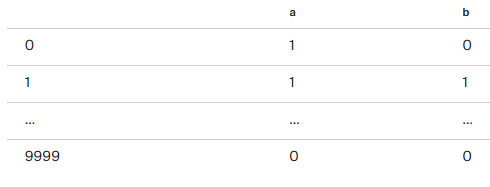
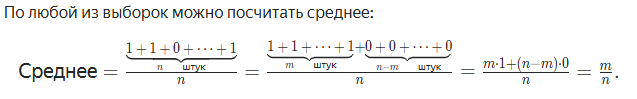
Здесь m — количество пользователей в выборке, забронировавших себе поездку, а n — общее количество пользователей в выборке. Так фактически получится доля «единичек» во всей выборке, что, по сути, и будет долей бронирований.

помогите команде принять решение и проверьте гипотезу о том, что «Колесо путешествий» действительно повышает бронирования.

In [7]:
from scipy import stats as st
import pandas as pd

data = pd.read_csv('https://code.s3.yandex.net/datasets/travel_wheel.csv')

# Напишите ваш код здесь
group_a_data = data['a']

group_b_data = data['b']

alpha = .05

results = st.ttest_ind(
    group_a_data,
    group_b_data,
    alternative='less') #Альтернативная гипотеза, которую проверяем: mu1 < mu2

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0028964023841479805
Отвергаем нулевую гипотезу


Кажется, «Колесо путешествий» действительно даёт толчок для принятия решений и помогает пользователям забронировать поездки. Доля бронирований среди тех, кто воспользовался этой функцией, заметно выросла, и эта разница статистически значима.

## t-тест Стьюдента
 -  t-тест Стьюдента может привести к ложному выводу из-за выбросов.
 
**Условия применимости t-тест Стьюдента**  
Чтобы применить t-тест Стьюдента при проверке гипотез важно учесть три условия:
 - выборочное среднее должно быть распределено нормально;
 - значения в выборках должны быть независимые и одинаково распределённые;
 - дисперсии генеральных совокупностей неизвестны, но подразумевается, что они должны быть равны. 
 
1. утверждение о нормальности выборочного среднего подтверждается практикой: в реальных задачах крайне малые выборки встречаются редко. При этом важно отметить, что **распределение исходных данных не обязательно должно быть нормальным.**

когда выборочное среднее может быть не распределено нормально например:
 - ильные выбросы в данных,
 - яжёлые хвосты у распределения исходной выборки.

В формулировке Центральной предельной теоремы есть важное условие: данные в выборке должны быть однородными по масштабу. Это значит, что все значения должны быть примерно сопоставимыми по масштабу и не слишком сильно влиять на общее распределение. Если в выборке есть как очень маленькие, так и очень большие значения, это может вызвать перекос, а неоднородности и выбросы могут нарушить действие ЦПТ.

пример двух выборок, в каждой — больше 
1000
1000 наблюдений. Однако распределение наблюдений в первой выборке имеет тяжёлые хвосты, тогда как вторая выборка выглядит более стандартной — без выбросов и тяжёлых хвостов.
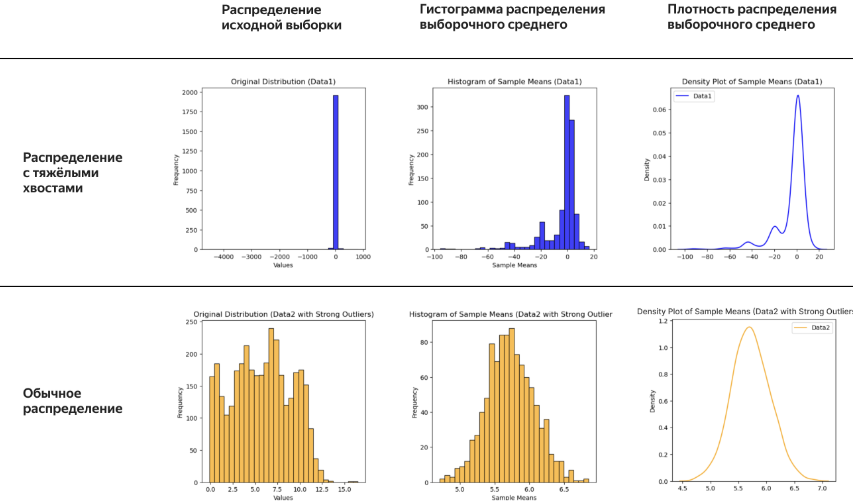
 Таблица показывает, что распределение выборочных средних для первой выборки сильно отличается от нормального, в то время как для второй выборки оно близко к нормальному. Это показывает, что даже большой объём выборки не всегда гарантирует нормальность выборочного среднего, поэтому это условие важно проверять на ваших данных.

Чтобы ЦПТ заработала и распределение выборочного среднего приблизилось к нормальному, можно увеличить объём данных. В таких случаях порог в 
30
30 значений не всегда помогает, поэтому чем больше данных — тем лучше. Это снизит влияние выбросов на среднее значение и уменьшит перекос.

Для t-теста важно нормальное распределение выборочного среднего, а не исходной выборки. ЦПТ позволяет применять t-тест для больших выборок, даже если исходные данные не нормальны.

2. Для корректного применения t-теста Стьюдента выборки должны быть независимыми и одинаково распределёнными (англ. independent and identically distributed, сокращённо i.i.d.), чтобы результаты теста были статистически надёжными и валидными. 

**принцип независимости наблюдений включает в себя два вида:**
 - независимость наблюдений внутри одной выборки и 
 - независимость наблюдений между двумя выборками.

независимость говорит, что результат одного наблюдения не влияет на результат другого. В статистике это важно, потому  данные не должны быть связаны друг с другом.

Например, если выборка состоит из сумм покупок одного пользователя, это зависимая выборка: наблюдения связаны между собой, так как текущая покупка может зависеть от предыдущих или других факторов поведения. Это нарушает условие независимости, необходимое для t-теста.

С другой стороны, выборка будет независимой, если:
Каждое наблюдение — это сумма всех покупок одного пользователя.
Разные значения принадлежат разным пользователям.

Если выборка не является независимой, то её нужно обрабатывать с использованием других методов, например, моделей для зависимых данных, что делает применение t-теста некорректным.

Ещё одна ситуация, которую важно избегать для соблюдения условия независимости, — это зависимость одной выборки от другой. Здесь критически важно, чтобы данные одного пользователя полностью принадлежали только одной выборке. Если часть данных о покупках пользователя попадёт в первую выборку, а часть — во вторую, между выборками возникнет взаимосвязь.

**Одинаковое распределение означает**, что все наблюдения (или данные) в выборке следуют одному и тому же распределению вероятностей. Важно, чтобы у всех элементов выборки были одинаковые параметры. Например, в случае с подбрасыванием монеты вероятность выпадения орла и решки для каждого подбрасывания должна быть одинаковой — 50%.

### Равенство дисперсии и t-тест Уэлча (equal_var=True)
Одно из ключевых условий применения двухвыборочного t-теста Стьюдента — равенство дисперсий генеральных совокупностей. Это свойство также называют гомоскедастичностью. 

Поскольку дисперсии генеральных совокупностей неизвестны, предполагается равенство выборочных дисперсий. Неравенство дисперсий увеличивает риск ошибочного отклонения как нулевой, так и альтернативной гипотез.

Если при проверке гипотезы выборочные дисперсии сильно различаются, это говорит о том, что дисперсии генеральных совокупностей тоже, скорее всего, разные. В таком случае классический двухвыборочный t-тест Стьюдента применять нельзя. Вместо него используют t-тест Уэлча — модификацию t-теста Стьюдента, которая не требует равенства дисперсий.

Тест Уэлча корректирует количество степеней свободы с учётом дисперсий и размеров выборок. Это делает его более гибким и надёжным для работы с неоднородными данными.

Для того, чтобы применить t-тест Уэлча вместо Стьюдента в **методе ttest_ind**из библиотеки scipy.stats в Python нужно **прописать параметр equal_var=False** (по умолчанию передаётся equal_var=True).

Как видно из названия, параметр equal_var (от англ. equal variance — «равная дисперсия») указывает, равны ли выборочные дисперсии. Ниже — пример того, как это выглядит на практике:

In [8]:
# from scipy import stats as st

# result = st.ttest_ind(
#     group_1,
#     group_2,
#     equal_var=False, # если False - значит проверяется t-тестом Уэлча
#     alternative='two-sided'
# )

Важно понимать, что равенство дисперсий не означает их точного совпадения. Речь идёт о приблизительном равенстве. Например, если дисперсии двух выборок различаются незначительно, это можно считать допустимым равенством.

t-тест Уэлча можно использовать даже при равных дисперсиях, так как его формула учитывает возможные различия между выборками. Если дисперсии одинаковы, результаты теста Уэлча будут почти идентичны классическому двухвыборочному t-тесту Стьюдента. Однако тест Уэлча более универсален: он подходит для любых случаев, независимо от равенства дисперсий. 

Поэтому, если вы не уверены в равенстве дисперсий, лучше использовать t-тест Уэлча — это безопаснее.

Исследуем, насколько существенна разница между использованием t-теста Стьюдента и  Уэлча. Предположим, вы проверяете гипотезу о равенстве средних двух выборок, каждая из которых содержит по 30 наблюдений. Дисперсия первой выборки равна 12, а второй — 20. Рассчитайте, на сколько больше будет количество степеней свободы при использовании t-теста Стьюдента по сравнению с t-тестом Уэлча. Ответ округлите до двух знаков после запятой.
Воспользуйтесь формулой количества степеней свободы, когда используете t-тест Уэлча: 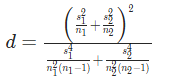
Правильный ответ: 4,59

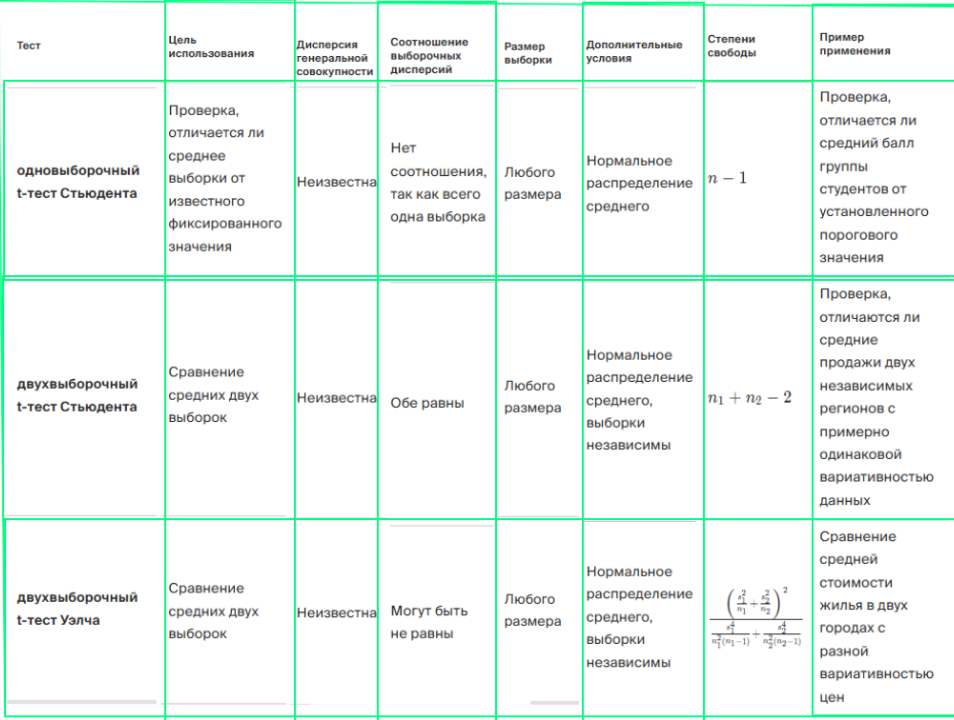

## Ошибки I и II рода
После проверки можно либо отвергнуть, либо не отвергнуть нулевую гипотезу. И какое решение вы бы ни приняли, всегда есть риск допустить ошибку. И вот почему. Гипотезы проверяются на выборках, которые представляют только частью генеральной совокупности. Генеральная совокупность — полная картина, а выборка — только часть этой картины.
Выборка может быть собрана так, что её свойства значительно отличаются от свойств генеральной совокупности. Кроме того, в ней могут присутствовать шумы или выбросы. Это может привести к ошибочным решениям: либо к ложному отвержению нулевой гипотезы, либо к её необоснованному принятию.

Ситуация, **когда отвергаем нулевую гипотезу** (то есть говорим, что есть статистически значимое изменение) и **когда она верна** (то есть когда нет статистически значимых изменений), называется **ошибкой первого рода  —или ложноположительным результатом.**

Ситуация, **когда принимаем нулевую гипотезу** (то есть говорим, что нет статистически значимого изменения) и **когда верна альтернативная**  (то есть когда есть статистически значимые изменения), называется ошибкой второго рода. **Или ложноотрицательным результатом.**
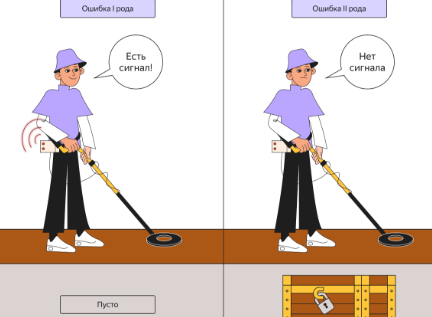 
металлодетектор подал сигнал на одном из участков пляжа. Вы раскапываете песок, но увы и ах – ничего не находите. 
Выходит, что ваш металлодетектор совершил ошибку первого рода. То есть он обнаружил драгоценности (или на языке проверки статистических гипотез —статистически значимое отклонение), когда их на самом деле не было.

детектор совершил ошибку второго рода. То есть он не обнаружил драгоценности (статистически значимое отклонение), когда они были у вас под ногами.

вероятность ошибки **первого рода** при проверке гипотезы определяется установленным уровнем значимости. По этой причине, вероятность ошибки первого рода точно так же обозначают как α — альфа. 

Вероятность ошибки **второго рода**(вероятность ошибочно принять нулевую гипотезу) обозначается β — бета.

Важно понимать, что ошибка первого рода тесно связана p-value. Как вы помните, оно показывает вероятность того, что наблюдаемые изменения могут быть получены случайно при условии, что верна нулевая гипотеза и реальных изменений нет.

Чем меньше p-value, тем менее вероятно, что такой эффект произошёл случайно. Тем больше оснований для того, чтобы считать изменения реальными, а значит, и отклонить нулевую гипотезу. Если p-value оказывается меньше уровня значимости, это означает, что вероятность получить наблюдаемые данные случайно при верности нулевой гипотезы довольно мала. Можно сказать, что она плохо оправдывает видимые нами изменения и по этой причине нежизнеспособна.

Таким образом, p-value по сути отражает уровень адекватности нулевой гипотезы. А уровень значимости в такой ситуации — некий «нижний порог адекватности».

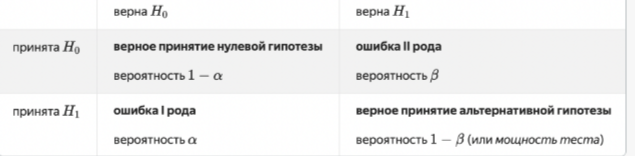

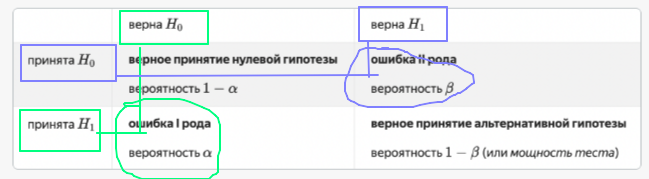

**Мощность теста** 
Все упомянутые параметры важны при проверке гипотез, но особое внимание уделяют мощности теста. Мощность теста — это его способность обнаруживать изменения, если они действительно существуют. Иными словами, это доля случаев, когда тест принимает альтернативную гипотезу, если она верна. Эта вероятность является противоположной вероятности ошибки второго рода, а значит их сумма должна давать 1. То есть,  если с вероятностью β мы ошибочно отвергаем альтернативную гипотезу, то с вероятностью 
1−β принимаем, если она верна.  Эта величина и есть мощность теста.
ошибка первого рода 
 - α - вероятность ошибочно отвергунуть нулевую гипотезу. ровень значимости (α) задаёт максимально допустимую вероятность ошибки первого рода
 - β - вероятность ошибочно принять нулевую гипотезу
 - 1 -β - доля принятия альтернативной гипотезы когда она верна. т.е. мощность теста, которая отражает вероятность правильно отвергнуть ложную гипотезу. = мощность теста
 - ошибка первого рода -  ситуацйия когда ошибочно **отвергается** нулевая гипотеза, т.е. когда нулевая гипотеза отвергается, хотя она на самом деле верна
 - ошибка второго рода -  ситуацйия когда ошибочно **принимается** нулевая гипотеза, т.е. когда нулевая гипотеза не отвергается, хотя она ложна.

Как соотносятся уровень значимости и ошибка второго рода.

С одной стороны, нужно минимизировать вероятность ошибки первого рода (α) — чтобы металлоискатель не пиликал понапрасну. С другой стороны, вас беспокоит мощность теста (1−β) — или, иными словами, чувствительность прибора. Ведь вы не хотите пройти мимо настоящих сокровищ.

между этими величинами существует компромисс: снижение уровня значимости (α) часто приводит к уменьшению мощности (1−β), и наоборот.

в проверке статистических гипотез, выбор уровня значимости и компромисс с мощностью теста определяются задачей исследования и степенью риска, которую вы готовы принять.

## Проблема множественной проверки гипотез
Что, если вам нужно проверить не одну гипотезу (под одной понимается одна пара нулевой и соответствующей ей альтернативной), а десятки или даже сотни? 

Ситуации, когда приходится сталкиваться с проверкой нескольких гипотез, называются **множественной проверкой гипотез.** 
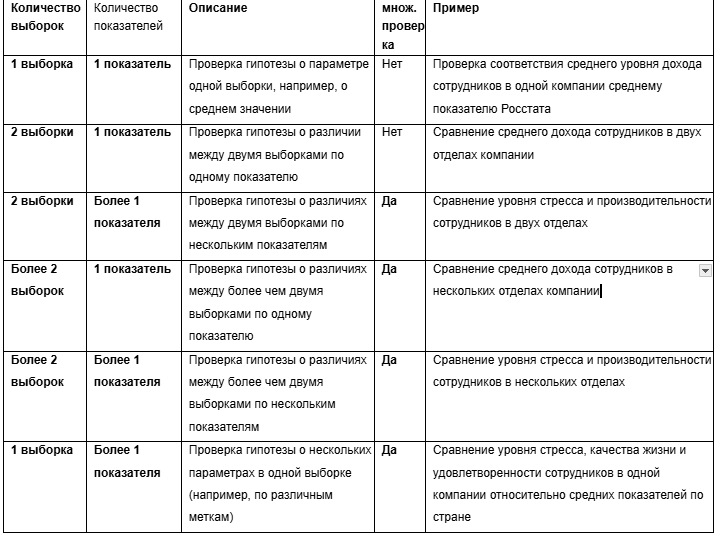

в отличие от ситуации с одной гипотезой, где есть только два исхода — либо ошибаемся, либо нет, — при проверке нескольких гипотез появляется простор для ошибок.

Можно ошибиться в одной гипотезе, в двух, или даже во всех проверяемых гипотезах. Каждая новая проверка добавляет вероятность ложного результата, и вероятность хотя бы одной ошибки начинает быстро расти.
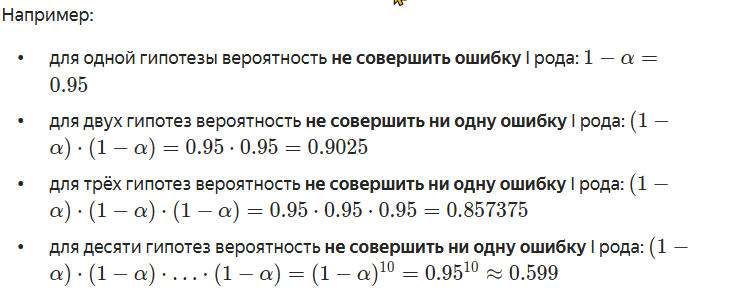
Таким образом, чем больше гипотез проверяем, тем ниже вероятность не совершить ни одной ошибки I рода. А так как противоположное этому событию — событие совершить хотя бы одну ошибку I рода, то с ростом количества проверяемых гипотез растёт и вероятность совершения ошибки I рода.  
А именно:
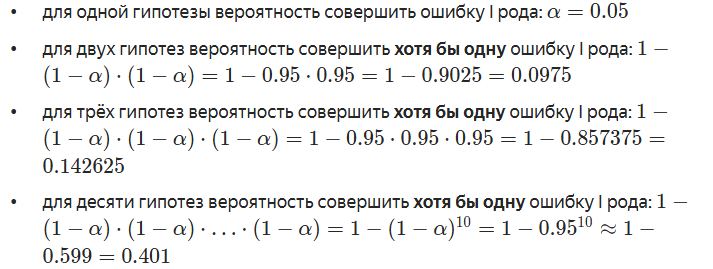
Из выкладок выше можно догадаться, что вероятность хотя бы одной ошибки I рода в случае n гипотез задаётся следующей формулой:
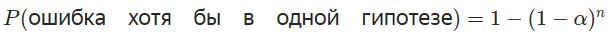

Эту вероятность ошибки принято называть FWER (от англ. family-wise error rate), что означает уровень ошибки для семейства гипотез. 

FWER показывает вероятность того, что хотя бы одна из нулевых гипотез будет ошибочно отклонена. Поэтому важно контролировать общий уровень ошибки для всего семейства гипотез, так как даже при низком уровне значимости α для каждой гипотезы суммарный риск ложных срабатываний может стать неприемлемо высоким.
Ниже отображён график роста ошибки FWER в зависимости от количества гипотез в семействе при α=0.05.
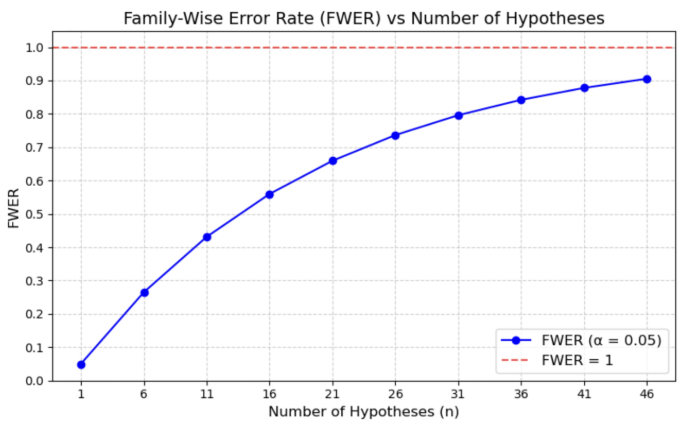

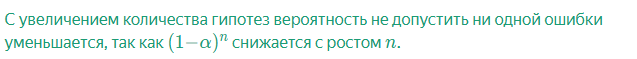
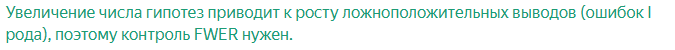
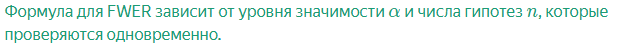

## Поправки на множественную проверку гипотез
### Поправка Бонферрони
**Поправка Бонферрони** — один из самых простых и известных методов контроля FWER. Она основывается на снижении уровня значимости для каждого теста.

Предположим, необходимо, чтобы при проверке n гипотез FWER не превышала α.

Тогда, согласно поправке Бонферрони, при проверке каждой отдельной гипотезы уровень значимости нужно скорректировать и принять равным **α корр = α / n**
. Поправка Бонферрони утверждает, что для любого α и количества гипотез, реальный FWER будет контролироваться.
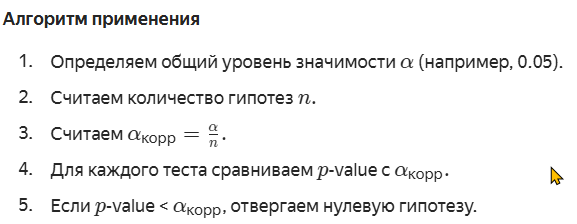
Например, предположим, что нужно проверить группу из пяти гипотез, при этом FWER не должна превышать 0.05. В каждом случае статистический тест дал следующие p-value:

№ гипотезы	p-value
 - 1 -	0.11
 - 2 -	0.03
 - 3 -	0.0017
 - 4 -	0.000063
 - 5 -	0.072
 
 Тогда, чтобы принять решение по каждой из гипотез, нужно будет соответствующее значение p-value сравнить с 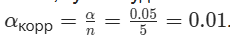 Это и будет уровнем значимости для каждой отдельно взятой гипотезы. Произведём проверку гипотез.
 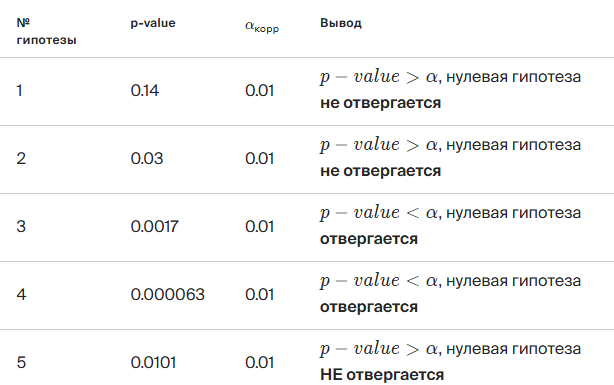
 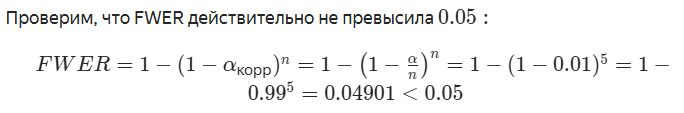

поправка Бонферрони предполагает независимость всех тестов, что не всегда возможно на практике. Кроме того, этот метод может оказаться излишне консервативным, особенно при большом количестве проверок, что повышает риск пропуска значимых результатов.

In [9]:
p_values = [0.02819637, 0.0273779 , 0.04339749, 0.00491257, 
            0.02889419, 0.02872316, 0.00556459]
fwer = 0.1
#n_tests = { 1: "1", 2: "2", 3: "3", 4: "4", 5: "5",6: "6",7: "7"}
#n_tests = [1,2,3,4,5,6,7]
n_tests = 7
# рассчитываем скорректированный уровень значимости
#alpha_corr = fwer / len(n_tests) # введите ваш код тут
alpha_corr = fwer / n_tests
# подсчёт количества отвергнутых нулевых гипотез
rejected_count = sum(
    [1 for index in range(len(p_values)) if p_values[index] <= alpha_corr])

# отвергнутые гипотезы
rejected_index = [index + 1 for index in range(len(p_values)) if p_values[index] <= alpha_corr]

# результаты
print(f"Скорректированный уровень значимости: {alpha_corr:.4f}")
print(f"Количество отвергнутых нулевых гипотез: {rejected_count}")
print(f"Номера отвергнутых гипотез: {rejected_index}")

Скорректированный уровень значимости: 0.0143
Количество отвергнутых нулевых гипотез: 2
Номера отвергнутых гипотез: [4, 7]


Похоже, сотрудники «Здоровья+» действительно страдают от недосыпа и низкой подвижности! Уровень физической активности и продолжительность сна отклоняются от нормы. Может, пора открыть в офисе спортивный зал и поставить на каждом этаже капсулы для сна, чтобы все успели отдохнуть между совещаниями! В любом случае эти негативные факторы полезно будет учесть в дальнейших исследованиях, а насчёт остальных показателей можно не переживать.

### Поправка Шидака
Поправка Шидака представляет собой усовершенствованный вариант поправки Бонферрони. В отличие от последней, она учитывает вероятности независимых событий, что позволяет применять её для проверки гипотез, где результаты одной не зависят от результатов другой.
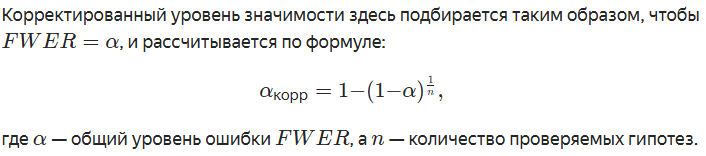

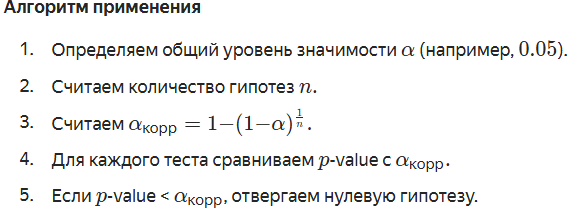
№ гипотезы	p-value
 - 1 -	0.14
 - 2 -	0.03
 - 3 -	0.0017
 - 4 -	0.000063
 - 5 -	0.0101
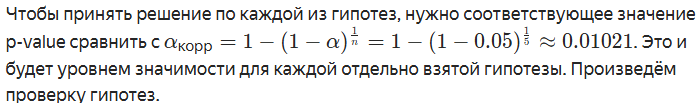 
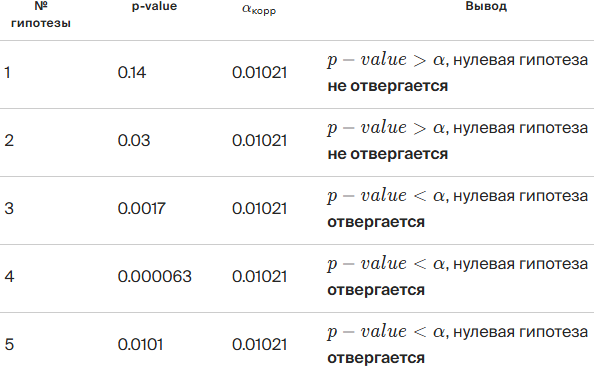

In [10]:

p_values = [0.005041477, 0.015849993, 0.002234888, 0.012584546]
fwer = 0.05
n_tests =  len(p_values) # введите ваш код тут

# рассчитываем скорректированный уровень значимости
alpha_corr = 1 - (1 - fwer) ** (1/n_tests) # введите ваш код тут

# подсчёт количества отвергнутых нулевых гипотез
rejected_count = sum(
    [1 for index in range(len(p_values)) if p_values[index] <= alpha_corr])


# отвергнутые гипотезы
rejected_index = [index + 1 for index in range(len(p_values)) if p_values[index] <= alpha_corr]

# результаты
print(f"Скорректированный уровень значимости: {alpha_corr:.4f}")
print(f"Количество отвергнутых нулевых гипотез: {rejected_count}")
print(f"Номера отвергнутых гипотез: {rejected_index}")

Скорректированный уровень значимости: 0.0127
Количество отвергнутых нулевых гипотез: 3
Номера отвергнутых гипотез: [1, 3, 4]


В отличие от предыдущего метода, эта поправка учитывает вероятности независимых событий. Это означает, что её можно использовать для проверки гипотез, в которых результат одной не будет зависеть от результата другой. Для наглядности рассмотрим пример.

Предположим, вы тестируете и сравниваете две версии мобильного приложения: старую медленную и новую ускоренную — по трём независимым метрикам: среднее время загрузки, частота ошибок и оценка пользователей. Для каждой метрики проверяются гипотезы о равенстве средних значений между версиями. Поскольку метрики независимы (например, время загрузки не связано напрямую с количеством ошибок или пользовательскими оценками), корректировку уровня значимости рекомендуется проводить с помощью поправки Шидака.

Для случаев, когда простые строгие поправки (Бонферрони и Шидака) снижают мощность теста, существуют более сложные методы, которые помогают контролировать как ошибку первого рода, так и ошибку второго рода. Например, **метод Холма** корректирует уровень значимости адаптивно, что помогает сохранить мощность теста. 

Другие методы, как **Бенджамини-Хохберг**, позволяют контролировать ложноположительные результаты при улучшенной мощности, обеспечивая чувствительность даже при множественных тестах. Эти методы помогают найти баланс между ошибками и мощностью теста.
На деле же, редко когда приходится сталкиваться с проверкой большого количества гипотез в одной группе, а на довольно малых n те же простые поправки ведут себя вполне хорошо.

### Почему поправки не всегда необходимы
На практике существуют ситуации, когда поправки на множественное тестирование могут быть необязательными. Например:

 - Если исследование носит предварительный характер, выборка очень большая или гипотезы теоретически обоснованы, вероятность ложноположительных результатов и так будет низкой.
 - Если важнее не пропустить реальные эффекты (например, в медицине) или используются гибкие методы контроля ошибок, поправки могут оказаться излишними.
 - В случае сильно коррелированных данных, скажем, в многомерных или временных исследованиях, поправки могут быть излишне строгими.
 
Если же ваша цель — проверить **одну гипотезу на нескольких группах, это не считается множественным тестированием.** Для таких случаев существуют специальные тесты для сравнения нескольких групп, такие как ANOVA. Они позволяют оценить различия между группами без необходимости применять поправки.

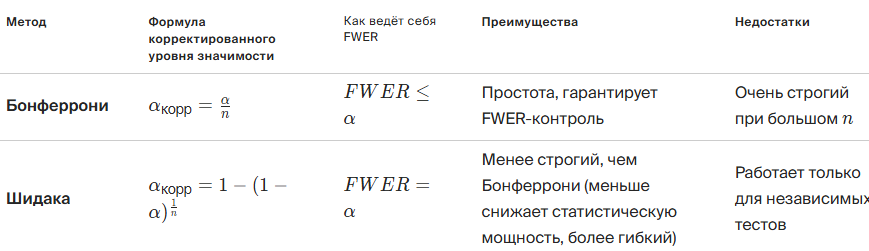